In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Get the url of the dataset
url = "https://www.openml.org/data/download/22102255/dataset"
d = requests.get(url, allow_redirects=True)

In [3]:
with open("dataset.txt", "wb") as f:
    f.write(d.content)

In [4]:
data = []

#To get the raw data
with open("dataset.txt", "r") as f:
    for l in f.read().split("\n"):
        if l.startswith("@") or l.startswith("%") or l == "":
            continue
        data.append(l)
    

In [5]:
columns = []

#To get the Column names/features
with open("dataset.txt", "r") as f:
    for l in f.read().split("\n"):
        if l.startswith("@ATTRIBUTE"):
            columns.append(l.split(" ")[1])


In [6]:
with open("ds.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [7]:
df = pd.read_csv("ds.csv")
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [8]:
df["final"] = df.round_winner.astype("category").cat.codes
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,final
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [9]:
correlations = df[columns+['final']].corr()
print(correlations['final'].apply(abs).sort_values(ascending=False).iloc[:30])

final                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [10]:
selected_cols = []

for cl in columns+["final"]:
    try:
        if abs(correlations[cl]["final"]) > 0.1:
            selected_cols.append(cl)
    except KeyError:
        pass

df_selected = df[selected_cols]
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,...,t_weapon_usps,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade,final
0,False,500.0,0.0,0.0,4000.0,0.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,600.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
2,False,391.0,294.0,200.0,750.0,0.0,0.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
3,False,391.0,294.0,200.0,750.0,0.0,0.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,18350.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,100.0,2.0,4.0,1.0,2.0,4.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1
122406,False,500.0,95.0,175.0,11500.0,1.0,2.0,1.0,5.0,5.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1
122407,False,500.0,495.0,475.0,1200.0,3.0,5.0,1.0,5.0,5.0,...,0.0,2.0,0.0,4.0,4.0,3.0,5.0,1.0,5.0,1
122408,False,500.0,495.0,475.0,1200.0,3.0,5.0,1.0,5.0,5.0,...,0.0,2.0,0.0,1.0,5.0,0.0,3.0,0.0,4.0,1


<AxesSubplot:>

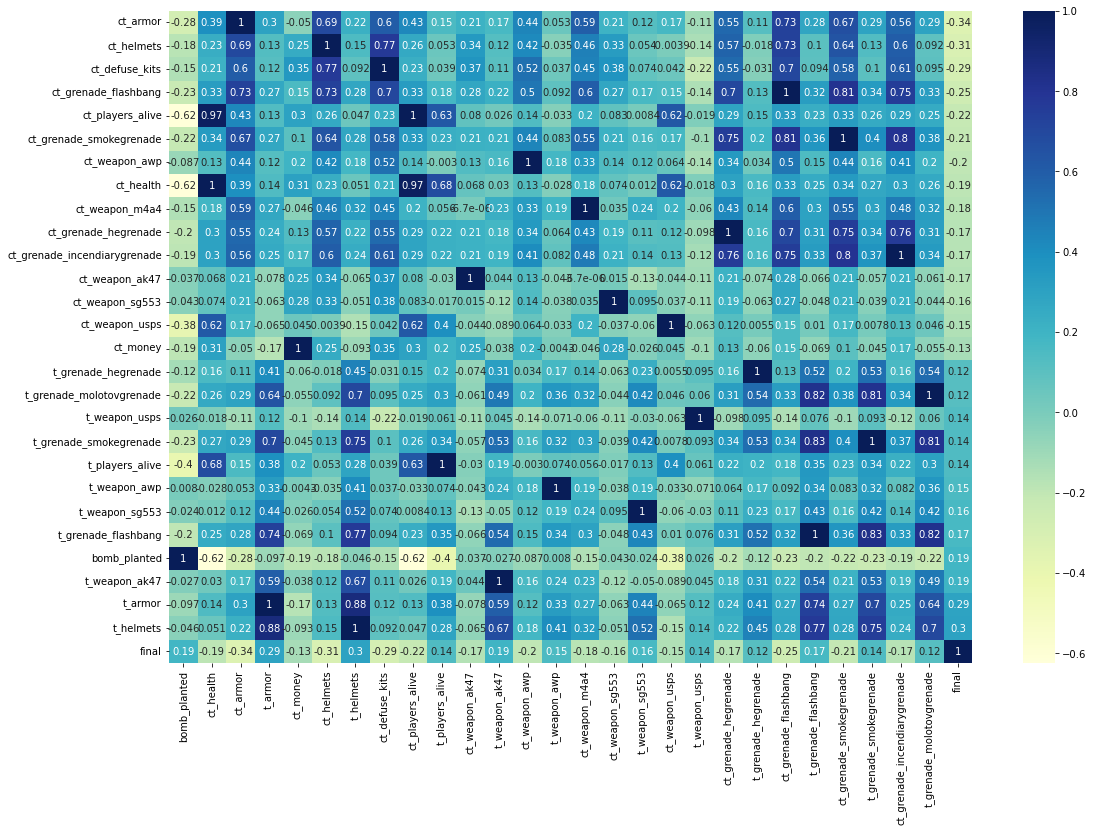

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(df_selected.corr().sort_values(by="final"), annot=True, cmap="YlGnBu")


In [12]:
from sklearn.model_selection import train_test_split

X,y = df_selected.drop(["final"], axis=1), df_selected["final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test_scaled, y_test)

0.7876398987010865

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [17]:
forest.score(X_test_scaled, y_test)


0.840127440568581